In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

dataset = pd.read_csv('assets.csv')
assets = dataset['Assets']

data = yf.download(assets.to_list(), start="2019-01-01", end="2024-01-01")


print(data.head(20))
print("\n\n")
print(data.tail(20))


[*********************100%%**********************]  28 of 28 completed


Price      Adj Close                                                          \
Ticker          ACUR       AGCO       CVLT       ENSG INMD       KBWR   MITK   
Date                                                                           
2019-01-02   0.13950  47.883621  57.439999  35.178860  NaN  39.271515  11.27   
2019-01-03   0.12272  46.857655  55.779999  34.736942  NaN  39.704788  10.67   
2019-01-04   0.12030  49.616516  58.060001  35.924610  NaN  40.553997  10.86   
2019-01-07   0.12030  51.280460  58.459999  36.513832  NaN  40.813957  11.04   
2019-01-08   0.12000  51.883972  59.930000  37.554195  NaN  41.229900  10.87   
2019-01-09   0.14250  52.763359  60.500000  38.686623  NaN  41.498524  10.85   
2019-01-10   0.14250  53.409966  60.810001  37.241169  NaN  41.498524  10.87   
2019-01-11   0.17500  53.409966  61.080002  36.909721  NaN  41.576511  10.89   
2019-01-14   0.17500  53.289272  60.200001  36.983376  NaN  41.732487  10.98   
2019-01-15   0.17000  53.341003  61.0800

In [6]:
stats_summary = data.describe()

annual_returns = data.std() * np.sqrt(252)
skew = data.skew()
annual_std = data.std() * np.sqrt(252)
kurtosis = data.kurtosis()

summary_stats = pd.DataFrame({
    'Annual Returns': annual_returns,
    'Annual Volatility': annual_std,
    'Skewness': skew,
    'Kurtosis': kurtosis
})

print(summary_stats)

                  Annual Returns  Annual Volatility   Skewness    Kurtosis
Price     Ticker                                                          
Adj Close ACUR      2.919949e+00       2.919949e+00   0.168087   -0.955427
          AGCO      4.658411e+02       4.658411e+02  -0.316595   -1.438000
          CVLT      1.901948e+02       1.901948e+02  -0.196176   -0.962012
          ENSG      3.368014e+02       3.368014e+02  -0.289867   -1.291965
          INMD      2.790712e+02       2.790712e+02   1.362373    2.086993
...                          ...                ...        ...         ...
Volume    RSPG      2.017434e+06       2.017434e+06   5.071400   44.117971
          SKY       5.197059e+06       5.197059e+06   7.206791  100.069397
          SMTC      1.837574e+07       1.837574e+07   9.945300  148.207774
          STEP      7.001481e+06       7.001481e+06  13.184995  233.856559
          WINA      2.307659e+05       2.307659e+05   7.095651  107.425584

[168 rows x 4 columns]


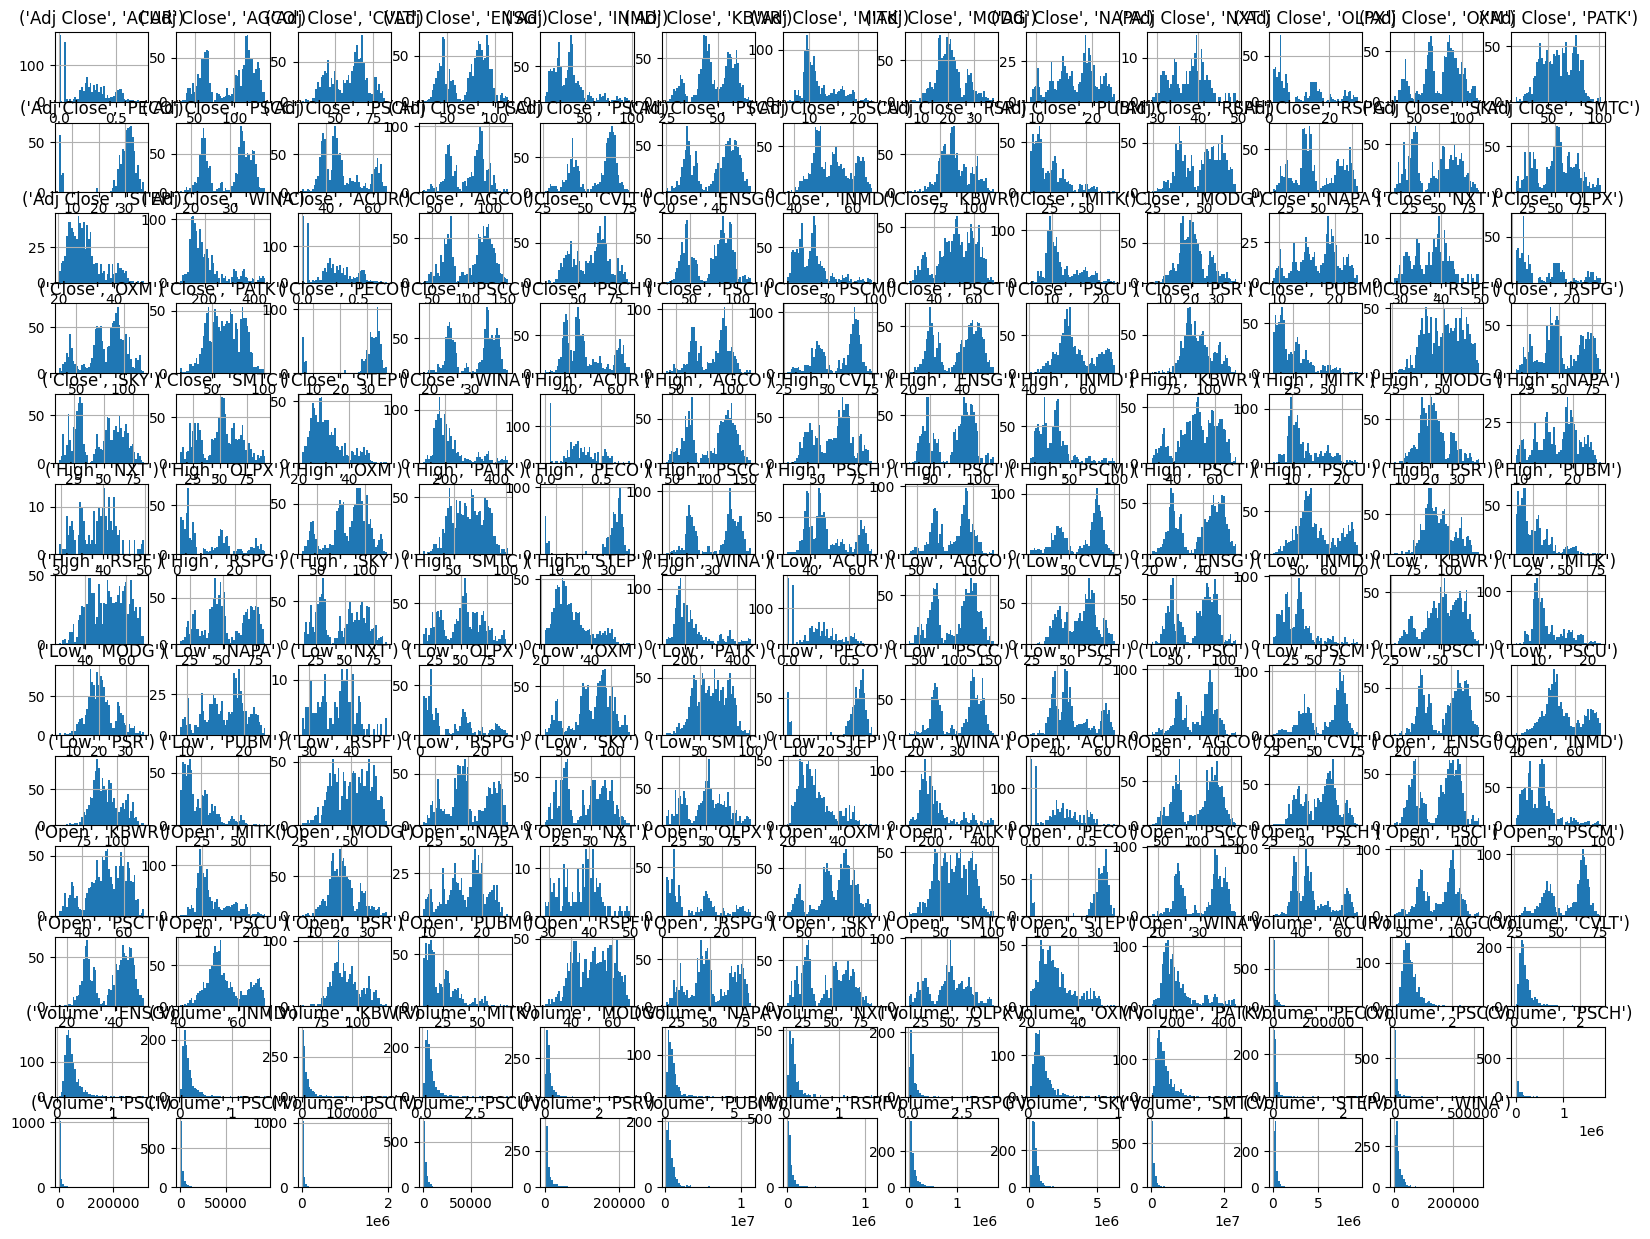

In [3]:

data.hist(bins=50, figsize=(20,15))
plt.show()

